In [ ]:
# Install rdkit
#!pip install rdkit-pypi

## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".


1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.


2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())


3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?



4. Print out the list of atoms.


5. Find the number of bonds.



In [3]:
from rdkit import Chem
paracetamol_molecule = Chem.MolFromSmiles("CC(=O)NC1=CC=C(O)C=C1")

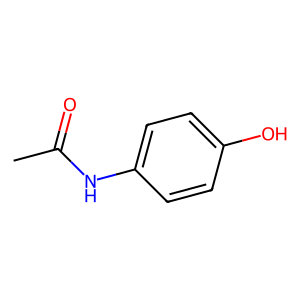

In [4]:
Chem.Draw.MolToImage(paracetamol_molecule)

In [5]:
num_atoms = paracetamol_molecule.GetNumAtoms()

print("Number of atoms: ", num_atoms)

Number of atoms:  11


There is 11 atoms insteed of 20 probably because the SMILES representation makes the Hydrogen atoms implicit.

In [6]:
atoms = paracetamol_molecule.GetAtoms()
for atom in atoms:
        atom_index = atom.GetIdx()
        atom_symbol = atom.GetSymbol()
        print(f"Atom {atom_index + 1}: {atom_symbol}")

Atom 1: C
Atom 2: C
Atom 3: O
Atom 4: N
Atom 5: C
Atom 6: C
Atom 7: C
Atom 8: C
Atom 9: O
Atom 10: C
Atom 11: C


In [7]:
num_bounds = paracetamol_molecule.GetNumBonds()
print("Number of bounds: ", num_bounds)

Number of bounds:  11


## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
"https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf".


1. Download this file and save it in a folder.


2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"


3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

In [8]:
morphine = Chem.SDMolSupplier("molecules/morphine.sdf")[0]

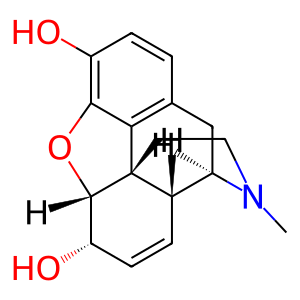

In [9]:
Chem.Draw.MolToImage(morphine)

In [10]:
from rdkit.Chem import AllChem

fingerprint = AllChem.GetMorganFingerprintAsBitVect(morphine, 2, nBits=1024)
fingerprint.ToBitString()

'000000000000000100000000000000000100100000000000000000000001000000010000000001000000000000000000000000000000000000000000010000000000000000100000000100100000000000000000000000000000000000000000000000000000000000011000000000000000000101000000000000000000000000000000000000100000000000000000000000001000000000000001000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000100001000000000000000000000000000000000000010000100000000000000000000000000000100000000001000000000000000000000000000000000001000000000000000000001000000000000001000000001010010000000000000010000000000000000000000000000000000000000000000001000000001000000001000000000000000000000000000000000000000100000000000000000000100000000000000000000000100000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000100000000000000000000000100000000000000000000000000000000000000000000000000001000000001000010000000000000001000000000000000000000000000000000000000000

## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.



1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVectCompute Class. Convert it to a numpy vector. Known that Paracetamol's SMILES is ""CC(=O)OC1=CC=CC=C1C(O)=O". Choose the number of bits nBits= 1024. Find the elements that are nonzero of the vector.

2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)NC1=CC=C(O)C=C1".



3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

In [26]:
import numpy as np
paracetamol_fingerprint = AllChem.GetMorganFingerprintAsBitVect(paracetamol_molecule, 2, nBits=1024)
paracetamol_fingerprint_np = np.array(paracetamol_fingerprint.ToList())
non_zero_elements_paracetamol = np.nonzero(paracetamol_fingerprint_np)

print("Number of non-zero elements: ", len(non_zero_elements_paracetamol[0]))

Number of non-zero elements:  19


In [27]:
aspirin_molecule = Chem.MolFromSmiles("CC(=O)NC1=CC=C(O)C=C1")
aspirin_fingerprint = AllChem.GetMorganFingerprintAsBitVect(aspirin_molecule, 2, nBits=1024)
aspirin_fingerprint_np = np.array(aspirin_fingerprint.ToList())
non_zero_elements_aspirin = np.nonzero(aspirin_fingerprint_np)

print("Number of non-zero elements: ", len(non_zero_elements_aspirin[0]))

Number of non-zero elements:  19


In [24]:
from rdkit import DataStructs
similarity_paracetamol_aspirin = DataStructs.DiceSimilarity(paracetamol_fingerprint, aspirin_fingerprint)

print(f"Dice Similarity between Paracetamol and Aspirin: {similarity_paracetamol_aspirin}")

Dice Similarity between Paracetamol and Aspirin: 1.0


## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [30]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

calculator = MolecularDescriptorCalculator([desc[0] for desc in Descriptors._descList])

In [31]:
descriptors = calculator.CalcDescriptors(paracetamol_molecule)
for desc_name, desc_value in zip(Descriptors.descList, descriptors):
    print(f"{desc_name[0]}: {desc_value}")

MaxEStateIndex: 10.524468537414966
MinEStateIndex: -0.11510204081632636
MaxAbsEStateIndex: 10.524468537414966
MinAbsEStateIndex: 0.11510204081632636
qed: 0.5950261967780849
MolWt: 151.165
HeavyAtomMolWt: 142.093
ExactMolWt: 151.063328528
NumValenceElectrons: 58
NumRadicalElectrons: 0
MaxPartialCharge: 0.22074743631242583
MinPartialCharge: -0.5079643157925783
MaxAbsPartialCharge: 0.5079643157925783
MinAbsPartialCharge: 0.22074743631242583
FpDensityMorgan1: 1.3636363636363635
FpDensityMorgan2: 1.9090909090909092
FpDensityMorgan3: 2.3636363636363638
BCUT2D_MWHI: 16.25468871437965
BCUT2D_MWLOW: 10.280190859964755
BCUT2D_CHGHI: 1.9280360590359866
BCUT2D_CHGLO: -1.9945540738765895
BCUT2D_LOGPHI: 2.12524757916018
BCUT2D_LOGPLOW: -2.04401131261029
BCUT2D_MRHI: 5.88095478459792
BCUT2D_MRLOW: -0.11373578338266109
BalabanJ: 2.7362980721056545
BertzCT: 253.29949758389105
Chi0: 8.267584713501616
Chi0n: 6.164862962722325
Chi0v: 6.164862962722325
Chi1: 5.1815405503520555
Chi1n: 3.2490981480278296
Chi

## Ex5: SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.

1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).


2. Highlight the pattern "CCC" in these molecules.


3. Do the same thing ex 1 but for the pattern "C(=O)N".

In [52]:
smiles_list = ["CCCCC","CCOCC","CCNCC","CC(=O)NC1=CC=C(O)C=C1", "CC(=O)NC1=CC=C(O[13CH3])C=C1", "CN(C(=O)C(Cl)Cl)C1=CC=C(O)C=C1"]

pattern = Chem.MolFromSmiles("CCC")
molecules_with_pattern_1 = []

for smiles in smiles_list:
    molecule = Chem.MolFromSmiles(smiles)
    if molecule is not None and molecule.HasSubstructMatch(pattern):
        molecules_with_pattern_1.append(smiles)

print("Molecules containing the 'CCC' pattern:")
for smiles in molecules_with_pattern_1:
    print(smiles)

Molecules containing the 'CCC' pattern:
CCCCC


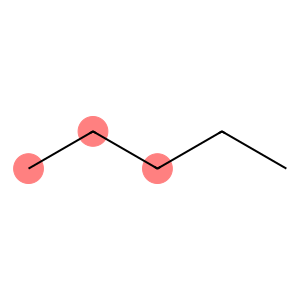

In [53]:
from IPython.display import display

for smile in molecules_with_pattern_1:
    molecule = Chem.MolFromSmiles(smile)
    substructure_atoms = molecule.GetSubstructMatch(pattern)
    highlighted_molecule = Chem.Draw.MolToImage(molecule, size=(300, 300), wedgeBonds=True, highlightAtoms=substructure_atoms)

    display(highlighted_molecule)

In [54]:
smiles_list = ["CCCCC","CCOCC","CCNCC","CC(=O)NC1=CC=C(O)C=C1", "CC(=O)NC1=CC=C(O[13CH3])C=C1", "CN(C(=O)C(Cl)Cl)C1=CC=C(O)C=C1"]

pattern = Chem.MolFromSmiles("C(=O)N")
molecules_with_pattern_2 = []

for smiles in smiles_list:
    molecule = Chem.MolFromSmiles(smiles)
    if molecule is not None and molecule.HasSubstructMatch(pattern):
        molecules_with_pattern_2.append(smiles)

print("Molecules containing the 'CCC' pattern:")
for smiles in molecules_with_pattern_2:
    print(smiles)

Molecules containing the 'CCC' pattern:
CC(=O)NC1=CC=C(O)C=C1
CC(=O)NC1=CC=C(O[13CH3])C=C1
CN(C(=O)C(Cl)Cl)C1=CC=C(O)C=C1


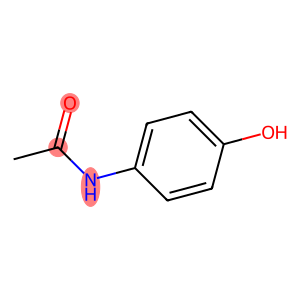

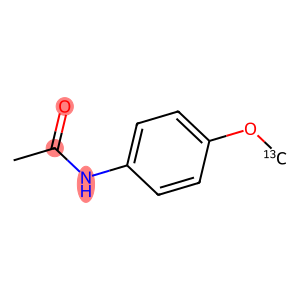

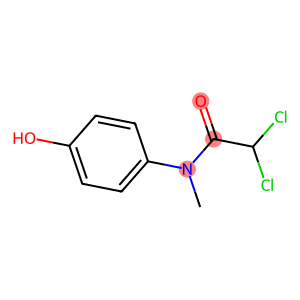

In [55]:
for smile in molecules_with_pattern_2:
    molecule = Chem.MolFromSmiles(smile)
    substructure_atoms = molecule.GetSubstructMatch(pattern)
    highlighted_molecule = Chem.Draw.MolToImage(molecule, size=(300, 300), wedgeBonds=True, highlightAtoms=substructure_atoms)

    display(highlighted_molecule)

## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:


1. Download file from "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf".


2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.


3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.


4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.


5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.


6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



In [ ]:
#!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf

--2023-08-20 21:02:05--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1376487 (1.3M) [text/plain]
Saving to: ‘solubility.train.sdf’

solubility.train.sd 100%[===================>]   1.31M  --.-KB/s    in 0.06s   

2023-08-20 21:02:05 (21.2 MB/s) - ‘solubility.train.sdf’ saved [1376487/1376487]



In [56]:
molecule_list = Chem.SDMolSupplier("data/solubility.train.sdf")

In [57]:
def calculate_descriptors(mol):
    calculator = MolecularDescriptorCalculator([desc[0] for desc in Descriptors._descList])
    descriptors = calculator.CalcDescriptors(mol)
    return descriptors

In [85]:
import pandas as pd
df = pd.DataFrame([calculate_descriptors(mol) for mol in molecule_list])

df.head()

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,2.211806,1.343750,2.211806,1.343750,0.468786,72.151,60.055,72.09390,32,0,...,0,0,0,0,0,0,0,0,0,0
1,1.500000,1.500000,1.500000,1.500000,0.408362,70.135,60.055,70.07825,30,0,...,0,0,0,0,0,0,0,0,0,0
2,2.231806,1.355000,2.231806,1.355000,0.462954,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,1,0
3,2.253472,0.898148,2.253472,0.898148,0.483890,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,0,0
4,2.243056,0.541667,2.243056,0.541667,0.424482,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
labels = np.array([mol.GetProp("SOL") for mol in molecule_list]).astype(float)

array([-3.18, -2.64, -3.84, ..., -1.42, -5.51, -3.21])

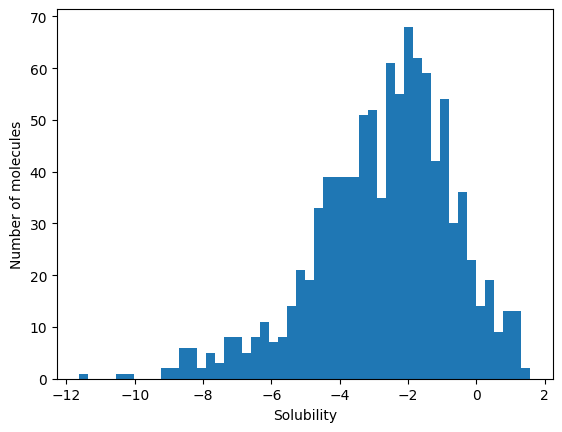

In [67]:
import matplotlib.pyplot as plt
plt.hist(labels, bins=50)
plt.xlabel("Solubility")
plt.ylabel("Number of molecules")
plt.show()

## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.


2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.


3. Construct and train a regression model.


4. Calculate the square root error for the dataset

In [86]:
#get nan rows of df and delete them in df and labels
nan_rows = df[df.isnull().any(axis=1)]

df = df.dropna()

labels = np.array([molecule_list[i].GetProp("SOL") for i in range(len(molecule_list)) if i not in nan_rows.index]).astype(float)


In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [89]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg = reg.fit(df_scaled, labels)

In [90]:
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(df_scaled)
rmse = mean_squared_error(labels, y_pred, squared=False)

print(f"RMSE: {rmse}")

RMSE: 0.5299230262374317


## Ex6.III Prepare data for test  and test model


1. Download file from "https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf".

2. Read molecules from this file and store them in a list named **list_molecule_test**.


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.


4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.


5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.

6. (Optional) Calculate the mean square root error of the model for this dataset.



Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


In [ ]:
# 1. Download the file
#!wget https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf

--2023-08-20 21:06:07--  https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 327929 (320K) [text/plain]
Saving to: ‘solubility.test.sdf’

solubility.test.sdf 100%[===================>] 320.24K  --.-KB/s    in 0.1s    

2023-08-20 21:06:07 (3.00 MB/s) - ‘solubility.test.sdf’ saved [327929/327929]



In [97]:
list_molecules_test = Chem.SDMolSupplier("data/solubility.test.sdf")

In [98]:
index, descriptor = 4, calculate_descriptors(list_molecules_test[4])

In [101]:
descriptor_scaled = scaler.transform([descriptor])[0]

In [102]:
predicted_solubility = reg.predict([descriptor_scaled])[0]
print(f"Predicted solubility: {predicted_solubility} vs real solubility: {list_molecules_test[index].GetProp('SOL')}")

Predicted solubility: -1.552337646484375 vs real solubility: -2.09
